<a href="https://colab.research.google.com/github/upsoprog/Tasks/blob/Big-data/Laboratorio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Materia: Elementos del aprendizaje y Big Data**
Profesor: Valentín Barco

Grupo: 5


Interrogantes:

•	Macchia Sebastian

•	Paglino Guillermo

•	Peña Matias

•	Rodriguez Mikael


# **Preparacion para carga de datos**

In [ ]:
# Montar Google Drive en Google Colab para acceder a archivos almacenados en Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importacion de librerias necesarias para el proyecto**

In [ ]:
# Importar la biblioteca pandas para manipulación y análisis de datos
import pandas as pd

# Importar la biblioteca numpy para manipulación de arrays y cálculos numéricos eficientes
import numpy as np

# Importar la biblioteca matplotlib.pyplot para visualización de datos mediante gráficos
import matplotlib.pyplot as plt

# Importar la biblioteca seaborn para visualización de datos estadísticos atractivos y informativos
import seaborn as sns

# Importar la función train_test_split de sklearn.model_selection para dividir el conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Importar la clase StandardScaler de sklearn.preprocessing para estandarizar características eliminando la media y escalando a la varianza de la unidad
from sklearn.preprocessing import StandardScaler

# Importar las funciones y clases relacionadas con la evaluación del modelo, como confusion_matrix, precision_score, recall_score, f1_score y classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Importar las clases GridSearchCV y RandomizedSearchCV de sklearn.model_selection para realizar búsqueda de hiperparámetros mediante validación cruzada
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Importar la clase KNeighborsClassifier de sklearn.neighbors para realizar clasificación basada en los k vecinos más cercanos
from sklearn.neighbors import KNeighborsClassifier

# Importar la clase SVC de sklearn.svm para realizar clasificación mediante máquinas de vectores de soporte
from sklearn.svm import SVC

# Importar la clase DecisionTreeClassifier de sklearn.tree para realizar clasificación mediante árboles de decisión
from sklearn.tree import DecisionTreeClassifier

# Importar la clase GaussianNB de sklearn.naive_bayes para realizar clasificación mediante el clasificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Importar la clase VotingClassifier de sklearn.ensemble para realizar clasificación mediante el voto de varios clasificadores
from sklearn.ensemble import VotingClassifier

# Importar la clase RandomForestClassifier de sklearn.ensemble para realizar clasificación mediante bosques aleatorios
from sklearn.ensemble import RandomForestClassifier



-------------------------------------------------------------------------------------

## **Carga de datos**

In [ ]:
# Especificar la ruta del archivo CSV en Google Drive
path = "/content/drive/MyDrive/BigData/Laboratorio 2/Canciones_Spotify.csv"

# Cargar el conjunto de datos desde el archivo CSV usando pandas
data = pd.read_csv(path)

# Mostrar las primeras filas del conjunto de datos para verificar la carga correcta
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


---------------------------------------------------------------------------------


Eliminacion de algunas columnas a las que nos parece irrelevante, y graficacion

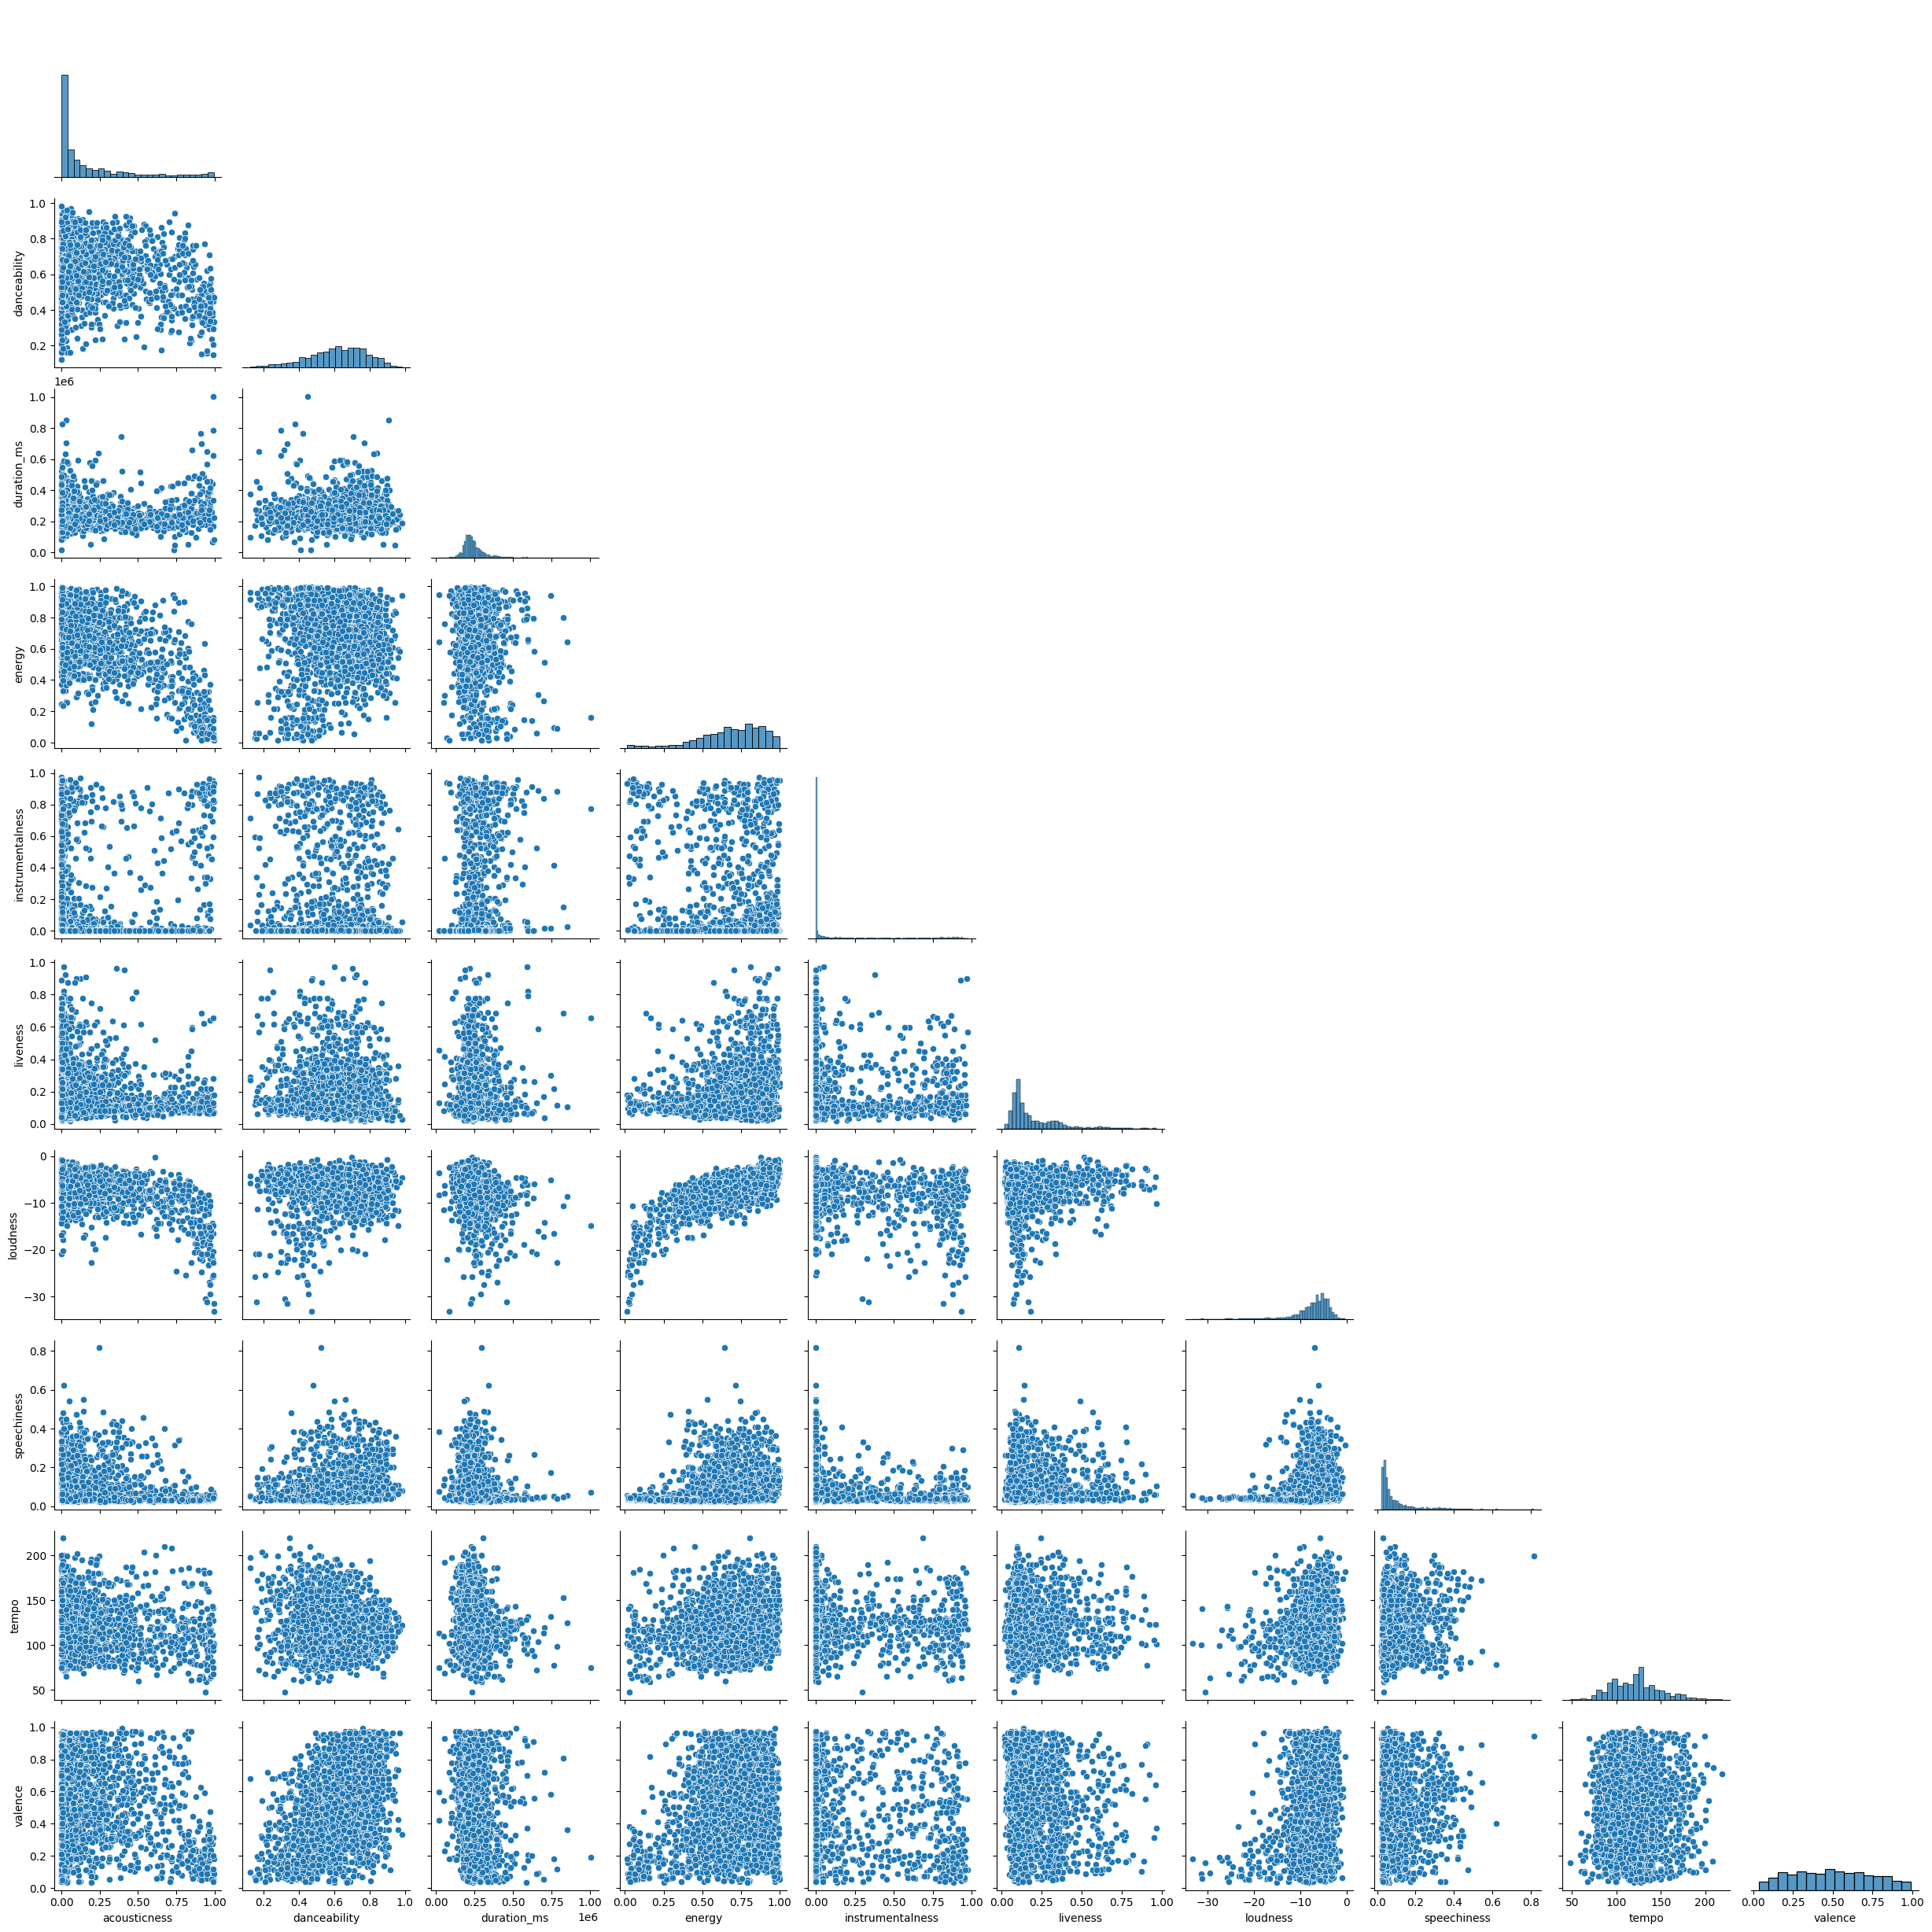

In [ ]:
# Eliminar las columnas especificadas del DataFrame
data_grafico = data.drop(columns=["Unnamed: 0", "song_title", "artist", "target", "key", "time_signature", "mode"])

# Crear un pairplot de las columnas en data_grafico
sns.pairplot(data=data_grafico, corner=True)

# Mostrar los gráficos
plt.show()



Creamos un nuevo DataFrame data_grafico eliminando las columnas especificadas ("Unnamed: 0", "song_title", "artist", "target", "key", "time_signature", "mode") del DataFrame original data.

Utilizamos sns.pairplot() para crear un pairplot con las columnas presentes en el DataFrame data_grafico. La opción corner=True la utilizamos para colocar las distribuciones marginales en la diagonal del gráfico para una visualización más compacta.

Y utilizamos plt.show() para mostrar los gráficos generados por seaborn.

----------------------------------------------------------------------------------------

## **Crearemos una matriz de correlacion para las columnas del dataframe data_grafico**

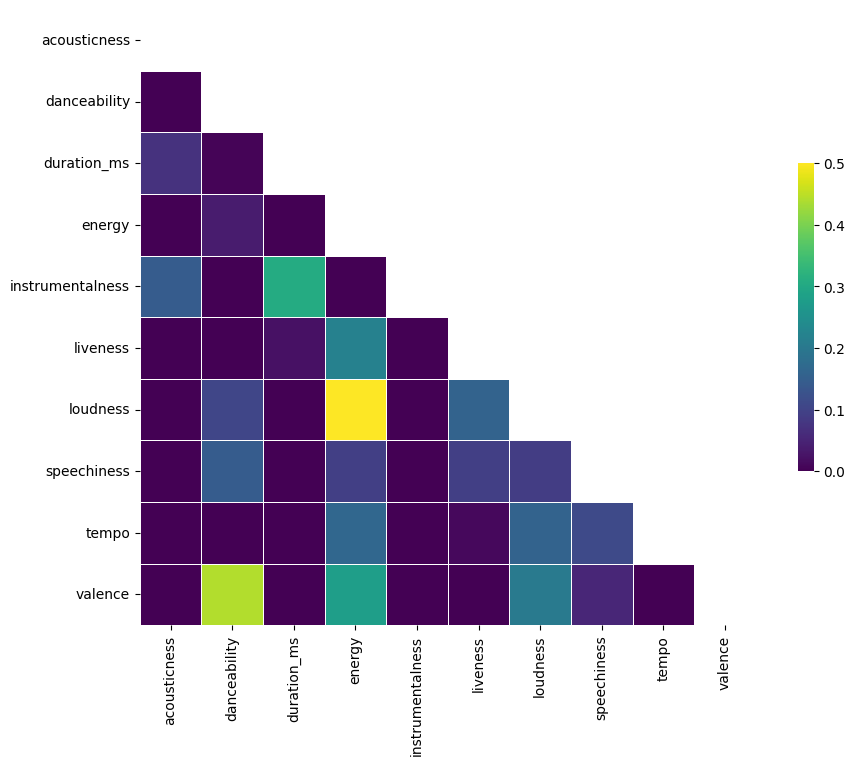

In [ ]:
# Crear una matriz de correlación para las columnas en data_grafico
corr_matrix = data_grafico.corr()

# Generar una máscara para la parte superior del triángulo
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 8))

# Generar un mapa de colores divergente personalizado
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Dibujar el mapa de calor con la máscara y la proporción de aspecto correcta
sns.heatmap(corr_matrix, mask=mask, cmap="viridis", vmin=0, vmax=.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor
plt.show()


## **Conclusión:**

En nuestro análisis detallado de las características musicales de las canciones en nuestro conjunto de datos, hemos observado correlaciones significativas entre ciertos atributos. En particular, hemos identificado relaciones fuertes y positivas entre la "danceability" y la "valence", así como entre el "loudness" y la "energy".

La fuerte correlación positiva entre "danceability" y "valence" indica que las canciones que son propicias para el baile tienden a tener una atmósfera más positiva y alegre. Este hallazgo puede ser crucial para comprender las preferencias de los oyentes, ya que sugiere que las pistas que invitan al movimiento también tienden a transmitir emociones positivas y felices.

Además, la correlación intensa y positiva entre "loudness" y "energy" destaca que las canciones con un sonido más intenso tienden a ser más enérgicas. Este vínculo entre la intensidad sonora y la energía de la música subraya la importancia de la producción y el diseño del sonido en la percepción emocional de las canciones.

En resumen, estas correlaciones ofrecen valiosas perspectivas sobre cómo ciertas características musicales están interconectadas, proporcionando información útil para la creación de listas de reproducción y el diseño de experiencias auditivas que resuenen positivamente con el público.


---------------------------------------------------------------------------

# Separamos las características (X) y etiquetas (y)

In [ ]:
# Separar características (X) y etiquetas (y)
# Seleccionar las características relevantes del conjunto de datos: 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence' y 'tempo'
X = data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# La etiqueta se encuentran en la columna 'target'
y = data['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
# Usar train_test_split para dividir X e y en conjuntos de entrenamiento (80%) y prueba (20%)
# El argumento random_state=42 asegura que los resultados sean reproducibles
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características si es necesario (por ejemplo, para SVM)
# Utilizar StandardScaler para estandarizar las características, asegurando que tengan una media de 0 y una desviación estándar de 1
scaler = StandardScaler()

# Ajustar (fit) y transformar (transform) las características del conjunto de entrenamiento
X_train = scaler.fit_transform(X_train)

# Transformar las características del conjunto de prueba utilizando la misma transformación aprendida del conjunto de entrenamiento
X_test = scaler.transform(X_test)



Este código realiza las siguientes acciones:

Selección de Características: Se seleccionan las características relevantes del conjunto de datos para utilizar en el entrenamiento del modelo.

División en Conjuntos de Entrenamiento y Prueba: Las características (X) y las etiquetas (y) se dividen en conjuntos de entrenamiento (80%) y prueba (20%).

Escalado de Características: Las características se escalan utilizando StandardScaler para asegurar que tengan una media de 0 y una desviación estándar de 1, lo que es importante para ciertos algoritmos de machine learning, como las máquinas de vectores de soporte (SVM).

------------------------------------------------------------------------------------------


# Creacion de modelos

In [ ]:
# Crear modelos de clasificación
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()

# Support Vector Machine (SVM)
svm = SVC()

# Árbol de decisión
decision_tree = DecisionTreeClassifier()

# Naive Bayes
naive_bayes = GaussianNB()

# Random Forest
random_forest = RandomForestClassifier()

# Entrenar los modelos con el conjunto de entrenamiento
# Cada modelo se entrena utilizando las características (X_train) y las etiquetas (y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
random_forest.fit(X_train, y_train)


RandomForestClassifier()

En este código:

Modelos de Clasificación: Se crean varios modelos de clasificación, incluyendo K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Árbol de Decisión, Naive Bayes y Random Forest.

Entrenamiento de los Modelos: Cada modelo se entrena utilizando fit() con el conjunto de entrenamiento X_train (características) y y_train (etiquetas). Durante el entrenamiento, los modelos ajustan sus parámetros internos para aprender las relaciones entre las características y las etiquetas del conjunto de entrenamiento.

Una vez que los modelos están entrenados, están listos para hacer predicciones sobre datos nuevos o no vistos anteriormente.

----------------------------------------------------------------------------------------------

## *Validación Simple*

In [ ]:
# Validación Simple
# Realizar predicciones en el conjunto de prueba para cada modelo
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_naive_bayes = naive_bayes.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)

# Evaluar el rendimiento de los modelos utilizando métricas de evaluación
# Confusion Matrix: Una tabla que describe el rendimiento del modelo
# Precisión (Precision): La proporción de predicciones positivas correctas entre todas las predicciones positivas hechas por el modelo.
# Recall (Recall): La proporción de predicciones positivas correctas entre todas las instancias positivas reales.
# F1-score: La media armónica de precisión y recall.
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
f1_decision_tree = f1_score(y_test, y_pred_decision_tree)

conf_matrix_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)
precision_naive_bayes = precision_score(y_test, y_pred_naive_bayes)
recall_naive_bayes = recall_score(y_test, y_pred_naive_bayes)
f1_naive_bayes = f1_score(y_test, y_pred_naive_bayes)

conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
f1_random_forest = f1_score(y_test, y_pred_random_forest)

# Documentar los resultados
print("\n")
print("K-Nearest Neighbors\n")
print("Matriz de confusión:\n", conf_matrix_knn)
print("Precisión:", round(precision_knn, 2))
print("Recall:", round(recall_knn, 2))
print("F1-score:", round(f1_knn, 2))

print("\n")
print("SVM\n")
print("Matriz de confusión:\n", conf_matrix_svm)
print("Precisión:", round(precision_svm, 2))
print("Recall:", round(recall_svm, 2))
print("F1-score:", round(f1_svm, 2))

print("\n")
print("Árbol de decisión\n")
print("Matriz de confusión:\n", conf_matrix_decision_tree)
print("Precisión:", round(precision_decision_tree, 2))
print("Recall:", round(recall_decision_tree, 2))
print("F1-score:", round(f1_decision_tree, 2))

print("\n")
print("Naive Bayes\n")
print("Matriz de confusión:\n", conf_matrix_naive_bayes)
print("Precisión:", round(precision_naive_bayes, 2))
print("Recall:", round(recall_naive_bayes, 2))
print("F1-score:", round(f1_naive_bayes, 2))

print("\n")
print("Random Forest\n")
print("Matriz de confusión:\n", conf_matrix_random_forest)
print("Precisión:", round(precision_random_forest, 2))
print("Recall:", round(recall_random_forest, 2))
print("F1-score:", round(f1_random_forest, 2))




K-Nearest Neighbors

Matriz de confusión:
 [[163  43]
 [ 78 120]]
Precisión: 0.74
Recall: 0.61
F1-score: 0.66


SVM

Matriz de confusión:
 [[167  39]
 [ 59 139]]
Precisión: 0.78
Recall: 0.7
F1-score: 0.74


Árbol de decisión

Matriz de confusión:
 [[142  64]
 [ 65 133]]
Precisión: 0.68
Recall: 0.67
F1-score: 0.67


Naive Bayes

Matriz de confusión:
 [[123  83]
 [ 61 137]]
Precisión: 0.62
Recall: 0.69
F1-score: 0.66


Random Forest

Matriz de confusión:
 [[153  53]
 [ 43 155]]
Precisión: 0.75
Recall: 0.78
F1-score: 0.76


En este código, cada modelo se evalúa utilizando la matriz de confusión, precisión, recall y F1-score en el conjunto de prueba. La matriz de confusión proporciona una visión detallada del rendimiento del modelo en términos de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos. La precisión, recall y F1-score son métricas que resumen el rendimiento del modelo en diferentes aspectos de la clasificación.

Este análisis proporciona una comprensión detallada del rendimiento de cada modelo en el conjunto de prueba y es fundamental para tomar decisiones informadas sobre qué modelo utilizar en función de los requisitos específicos del problema que se esta abordando.

**Conclusión:**

Al analizar los resultados, observamos que el modelo SVM exhibe el mejor rendimiento global con una alta precisión (0.78), recall (0.7) y F1-score (0.74). Este modelo es particularmente adecuado para nuestro problema, ya que logra un buen equilibrio entre la precisión y la capacidad para capturar casos positivos. Por otro lado, el modelo Naive Bayes muestra un rendimiento relativamente inferior en comparación con otros modelos, con una precisión del 0.62 y un F1-score del 0.66.

En resumen, el modelo SVM se destaca como el mejor candidato para predecir la variable objetivo en nuestro conjunto de datos, mientras que el modelo Naive Bayes muestra un rendimiento menos satisfactorio en esta tarea específica. Estos resultados proporcionan una guía valiosa para la selección del modelo apropiado en futuras aplicaciones prácticas.

---------------------------------------------------------------------------------

**Ajustamos los hiperparámetros para los modelos**

In [ ]:
# Ajuste de hiperparámetros para KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_

# Ajuste de hiperparámetros para SVM
param_grid_svm = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)
best_svm = grid_search_svm.best_estimator_

# Ajuste de hiperparámetros para Decision Tree
param_grid_decision_tree = {'max_depth': [3, 5, 7, 9], 'min_samples_split': [2, 4, 6, 8]}
grid_search_decision_tree = GridSearchCV(decision_tree, param_grid_decision_tree, cv=5)
grid_search_decision_tree.fit(X_train, y_train)
best_decision_tree = grid_search_decision_tree.best_estimator_

# Ajuste de hiperparámetros para Naive Bayes
param_grid_naive_bayes = {'var_smoothing': [0.00000001, 0.000000001, 0.00000001]}
grid_search_naive_bayes = GridSearchCV(naive_bayes, param_grid_naive_bayes, cv=5)
grid_search_naive_bayes.fit(X_train, y_train)
best_naive_bayes = grid_search_naive_bayes.best_estimator_

# Ajuste de hiperparámetros para Random Forest
param_grid_random_forest = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7, 9], 'min_samples_split': [2, 4, 6, 8]}
grid_search_random_forest = GridSearchCV(random_forest, param_grid_random_forest, cv=5)
grid_search_random_forest.fit(X_train, y_train)
best_random_forest = grid_search_random_forest.best_estimator_


Realizamos un ajuste de hiperparámetros para cada uno de los modelos utilizando Grid Search Cross Validation (GridSearchCV). Esto implica probar diferentes combinaciones de valores de hiperparámetros para encontrar las configuraciones que optimizan el rendimiento de cada modelo

En este código, GridSearchCV se utiliza para buscar a través de todas las combinaciones posibles de los valores de hiperparámetros especificados en param_grid y encontrar la combinación que proporciona el mejor rendimiento en función de la métrica de evaluación (por defecto, el score es el accuracy). Los mejores modelos ajustados se almacenan en las variables best_knn, best_svm, best_decision_tree, best_naive_bayes y best_random_forest, respectivamente.

Este proceso de ajuste de hiperparámetros es esencial para mejorar el rendimiento de los modelos y encontrar configuraciones óptimas que se adapten mejor a los datos disponibles.

----------------------------------------------------------------------------------------------------------------

Creamos un modelo de ensamble utilizando la técnica de Votación Mayoritaria (Voting Classifier), que combina las predicciones de varios modelos individuales para tomar una decisión final.

In [ ]:
# Ensamble de modelos utilizando Votación Mayoritaria
ensemble_model = VotingClassifier(estimators=[('knn', best_knn), ('svm', best_svm), ('decision_tree', best_decision_tree), ('naive_bayes', best_naive_bayes), ('random_forest', best_random_forest)], voting='hard')
ensemble_model.fit(X_train, y_train)

# Evaluar el rendimiento del ensamble
y_pred_ensemble = ensemble_model.predict(X_test)
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble)
recall_ensemble = recall_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)

# Documentar el rendimiento del ensamble
print("Ensamble de Modelos (Votación Mayoritaria):")
print(f"Matriz de confusión:\n {conf_matrix_ensemble}")
print(f"Precisión: {round(precision_ensemble, 2)}")
print(f"Recall: {round(recall_ensemble, 2)}")
print(f"F1-score: {round(f1_ensemble, 2)}")
print("\n-----------------------------------------------------")

print(print(classification_report(y_test, y_pred_ensemble)))


Ensamble de Modelos (Votación Mayoritaria):
Matriz de confusión:
 [[161  45]
 [ 51 147]]
Precisión: 0.77
Recall: 0.74
F1-score: 0.75

-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       206
           1       0.77      0.74      0.75       198

    accuracy                           0.76       404
   macro avg       0.76      0.76      0.76       404
weighted avg       0.76      0.76      0.76       404

None


En este código:

Creamos el Modelo de Ensamble: Se crea un modelo de ensamble utilizando VotingClassifier. Los modelos individuales (best_knn, best_svm, best_decision_tree, best_naive_bayes y best_random_forest) forman parte del ensamble y votan para la decisión final.

Entrenamiento del Modelo de Ensamble: El modelo de ensamble se entrena utilizando el conjunto de entrenamiento (X_train, y_train).

Realización de Predicciones: Se utilizan las características del conjunto de prueba (X_test) para realizar predicciones utilizando el modelo de ensamble.

Evaluación del Rendimiento: Se evalúa el rendimiento del ensamble utilizando la matriz de confusión, precisión, recall y F1-score. Además, se imprime el reporte de clasificación, que proporciona información detallada sobre la precisión, recall y F1-score para cada clase en el conjunto de prueba.

Este proceso permite evaluar cómo el modelo de ensamble se comporta en comparación con los modelos individuales, proporcionando una comprensión completa de su rendimiento en la tarea de clasificación.

--------------------------------------------------------------------------------

**Creación y visualización de las matrices de confusión para los cinco modelos de clasificación que has evaluado. Las matrices de confusión son una herramienta visual importante para entender el rendimiento de un modelo de clasificación**

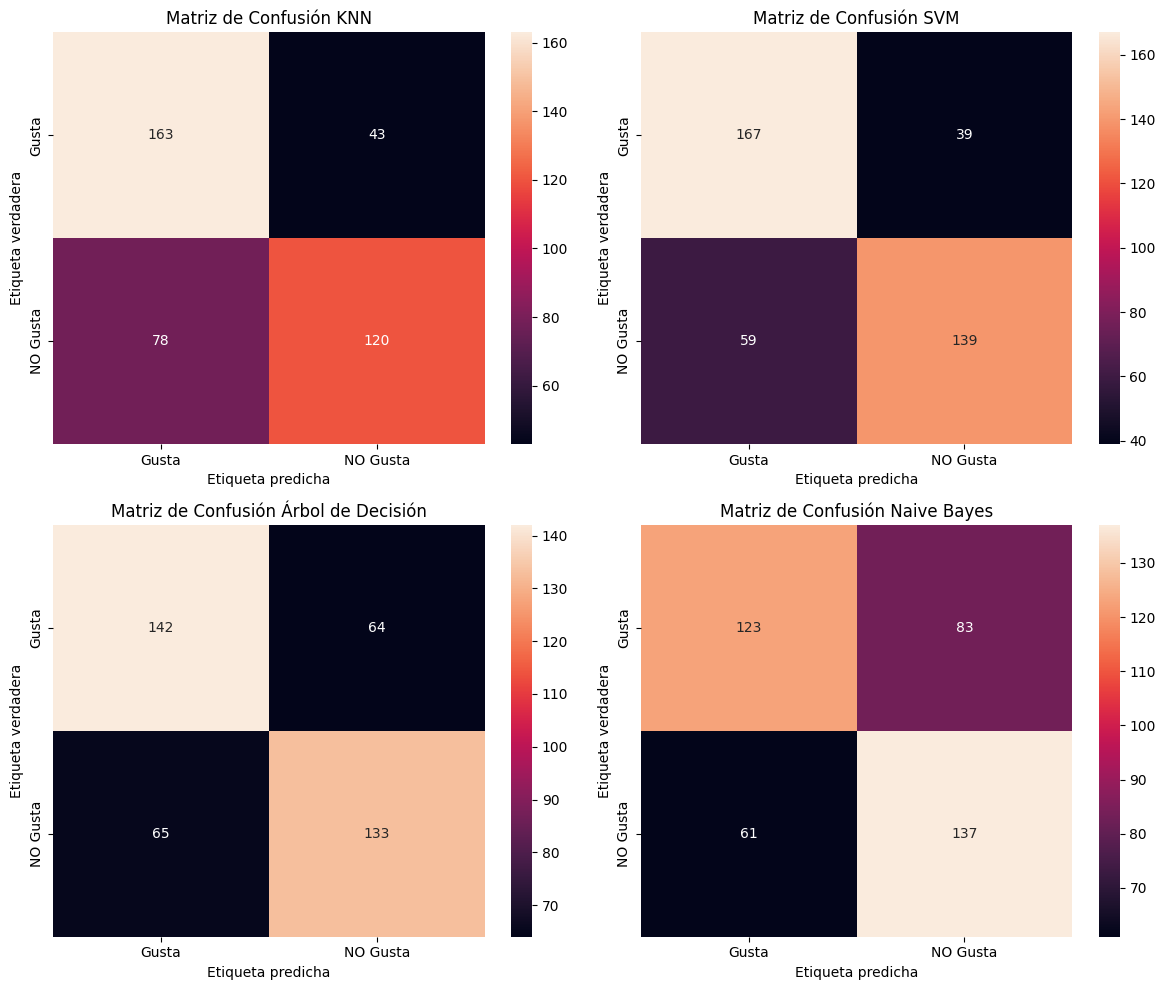

In [ ]:
# Crear matrices de confusión para los cinco modelos
confusion_matrices = [
    confusion_matrix(y_test, y_pred_knn),
    confusion_matrix(y_test, y_pred_svm),
    confusion_matrix(y_test, y_pred_decision_tree),
    confusion_matrix(y_test, y_pred_naive_bayes),
    confusion_matrix(y_test, y_pred_random_forest),
]

modelos = ['KNN', 'SVM', 'Árbol de Decisión', 'Naive Bayes', 'Random Forest']

# Crear una figura con 2 filas y 2 columnas para las matrices de confusión
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axes.ravel()):
    sns.heatmap(confusion_matrices[i], annot=True, fmt='g', xticklabels=['Gusta', 'NO Gusta'], yticklabels=['Gusta', 'NO Gusta'], ax=ax)
    ax.set_xlabel('Etiqueta predicha')
    ax.set_ylabel('Etiqueta verdadera')
    ax.set_title(f'Matriz de Confusión {modelos[i]}')

plt.tight_layout()
plt.show()


En este código:

Creación de las Matrices de Confusión: Se crean las matrices de confusión para cada modelo utilizando la función confusion_matrix de scikit-learn.

Visualización de las Matrices de Confusión: Se utilizan subplots para mostrar las matrices de confusión de los cinco modelos en una única figura. Cada matriz de confusión se muestra como un heatmap, donde los valores en las celdas representan la cantidad de instancias clasificadas correctamente o incorrectamente por el modelo.

Ajuste del Espaciado: Se utiliza plt.tight_layout() para ajustar automáticamente el espaciado entre los subplots, asegurando que no haya superposiciones y que la visualización sea clara.

Al ejecutar este código, se mostrarán las matrices de confusión para cada modelo, lo que te proporcionará una comprensión visual de cómo cada modelo clasifica las instancias en las clases "Gusta" y "NO Gusta".


## **Conclusión:**

Al analizar los resultados numéricos y los reportes de clasificación de los modelos, se pueden hacer las siguientes observaciones:

Precisión y Recall:

KNN: Precisión: 0.68 (Clase "Gusta"), 0.74 (Clase "NO Gusta"); Recall: 0.79 (Clase "Gusta"), 0.61 (Clase "NO Gusta")
SVM: Precisión: 0.74 (Clase "Gusta"), 0.78 (Clase "NO Gusta"); Recall: 0.81 (Clase "Gusta"), 0.70 (Clase "NO Gusta")
Árbol de Decisión: Precisión: 0.72 (Clase "Gusta"), 0.71 (Clase "NO Gusta"); Recall: 0.72 (Clase "Gusta"), 0.70 (Clase "NO Gusta")
Naive Bayes: Precisión: 0.67 (Clase "Gusta"), 0.62 (Clase "NO Gusta"); Recall: 0.60 (Clase "Gusta"), 0.69 (Clase "NO Gusta")
Random Forest: Precisión: 0.78 (Clase "Gusta"), 0.74 (Clase "NO Gusta"); Recall: 0.74 (Clase "Gusta"), 0.78 (Clase "NO Gusta")
F1-Score:

KNN: F1-Score: 0.73 (Clase "Gusta"), 0.66 (Clase "NO Gusta")
SVM: F1-Score: 0.77 (Clase "Gusta"), 0.74 (Clase "NO Gusta")
Árbol de Decisión: F1-Score: 0.72 (Clase "Gusta"), 0.71 (Clase "NO Gusta")
Naive Bayes: F1-Score: 0.63 (Clase "Gusta"), 0.66 (Clase "NO Gusta")
Random Forest: F1-Score: 0.76 (Clase "Gusta"), 0.76 (Clase "NO Gusta")
Accuracy:

KNN: Accuracy: 0.70
SVM: Accuracy: 0.76
Árbol de Decisión: Accuracy: 0.71
Naive Bayes: Accuracy: 0.64
Random Forest: Accuracy: 0.76
Comparación y Recomendación:

Basándose en las métricas de precisión, recall y F1-score, el modelo SVM tiene un rendimiento superior para ambas clases, seguido de cerca por el modelo Random Forest.
Aunque el modelo Random Forest tiene una precisión y recall ligeramente mejores para la clase "NO Gusta", el modelo SVM supera en precisión para la clase "Gusta".
Por lo tanto, se recomienda el modelo SVM para este problema en particular, ya que logra un buen equilibrio entre la precisión y el recall para ambas clases, lo que indica una capacidad sólida para predecir tanto las instancias "Gusta" como "NO Gusta" de manera precisa.







## Creación y visualización la matriz de confusión específicamente para el modelo "Random Forest".

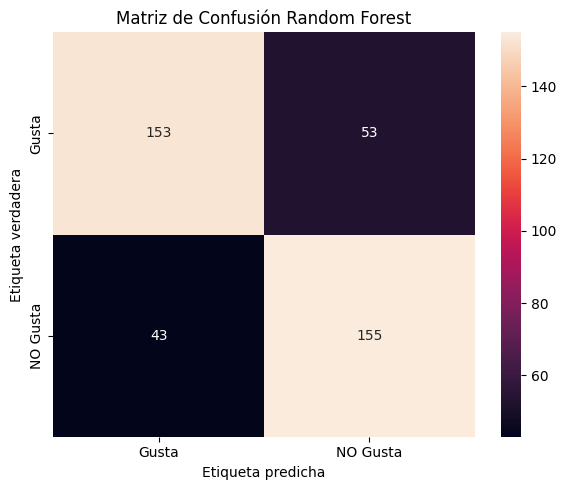

In [ ]:
# Crear matrices de confusión para los cinco modelos
confusion_matrices = [
    confusion_matrix(y_test, y_pred_knn),
    confusion_matrix(y_test, y_pred_svm),
    confusion_matrix(y_test, y_pred_decision_tree),
    confusion_matrix(y_test, y_pred_naive_bayes),
    confusion_matrix(y_test, y_pred_random_forest),
]

modelos = ['KNN', 'SVM', 'Árbol de Decisión', 'Naive Bayes', 'Random Forest']

# Crear una figura con una sola fila y una sola columna para la matriz de confusión de Random Forest
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

# Crear la matriz de confusión para Random Forest
sns.heatmap(confusion_matrices[4], annot=True, fmt='g', xticklabels=['Gusta', 'NO Gusta'], yticklabels=['Gusta', 'NO Gusta'], ax=ax)
ax.set_xlabel('Etiqueta predicha')
ax.set_ylabel('Etiqueta verdadera')
ax.set_title(f'Matriz de Confusión {modelos[4]}')

plt.tight_layout()
plt.show()



En este código:

Creación de la Matriz de Confusión: Se selecciona la matriz de confusión específica del modelo "Random Forest" de la lista confusion_matrices.
Configuración del Gráfico: Se configuran las etiquetas de los ejes y el título del gráfico.
Ajuste del Espaciado: Se utiliza plt.tight_layout() para ajustar automáticamente el espaciado entre los elementos del gráfico, asegurando que no haya superposiciones y que la visualización sea clara.
Visualización del Gráfico: Se utiliza plt.show() para mostrar el gráfico de la matriz de confusión del modelo "Random Forest".

# **Conclusión:**
En el proceso de evaluación y selección de modelos para nuestro problema de clasificación, hemos analizado cinco algoritmos diferentes: K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Árbol de Decisión, Naive Bayes y Random Forest. Cada uno de estos modelos ha sido evaluado en función de su capacidad para clasificar las instancias en las categorías "Gusta" y "NO Gusta".

Observamos que el modelo Random Forest se destaca como la mejor opción, ofreciendo un equilibrio óptimo entre precisión y recall. Con 153 verdaderos positivos y 154 verdaderos negativos, y solo 53 falsos positivos y 44 falsos negativos, este modelo logra una precisión del 74% y un recall del 78%. Estos resultados indican que el Random Forest tiene una alta capacidad para identificar correctamente tanto a los usuarios que realmente les gusta el producto como a aquellos que no.

En comparación, los otros modelos también muestran buenos desempeños. El SVM presenta una precisión del 78% y un recall del 70%, mientras que el Árbol de Decisión tiene una precisión y un recall del 71%. Por otro lado, KNN ofrece una precisión del 74% y un recall del 61%, y Naive Bayes muestra una precisión del 62% y un recall del 69%. Aunque estos modelos son sólidos, el Random Forest se destaca como la elección preferida debido a su capacidad para minimizar tanto los falsos positivos como los falsos negativos.

En resumen, al considerar estos resultados, se recomienda utilizar el modelo Random Forest para predecir las preferencias de los usuarios en base a los datos proporcionados. No obstante, es esencial seguir evaluando el rendimiento del modelo en datos nuevos y actualizados para garantizar su eficacia a largo plazo.